In [1]:
#author @swethabobba
import pandas as pd
url = 'https://raw.githubusercontent.com/nkovidreddy/databank/master/bank-additional/bank-additional-full.csv'
bank_read = pd.read_csv(url, sep=';')
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#List all columns for the data to view patterns lying in the data
print(bank_read.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [3]:
# The outcome is stored in column 'y' and 
#checking out the distinct values of outcome which are yes and no as shown below
bank_read['y'].unique()

array(['no', 'yes'], dtype=object)

In [4]:
#Converting 'No' to 0 and 'Yes' to 1 for statistical computations and value closer to 1 in predictive
# analysis is the customer is likely to subscribe versus 0 who would not be subscribing
#Storing the transformed values in a new column as outcome
bank_read['outcome']=bank_read.y.map({'no':0,'yes':1})


In [6]:
bank_read['outcome'].unique()

array([0, 1])

In [8]:
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [7]:
#New Columns is added
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome'],
      dtype='object')

In [10]:
#Lets explore how each column influences the outcome
bank_read['age'].isnull().sum()
bank_read.groupby('age').outcome.mean()

age
17    0.400000
18    0.428571
19    0.476190
20    0.353846
21    0.284314
22    0.262774
23    0.212389
24    0.185745
25    0.155518
26    0.174785
27    0.133960
28    0.150849
29    0.128011
30    0.117853
31    0.112994
32    0.099675
33    0.114566
34    0.105444
35    0.094940
36    0.086517
37    0.092881
38    0.101635
39    0.079609
40    0.072351
41    0.088419
42    0.079685
43    0.083412
44    0.076162
45    0.083409
46    0.076699
        ...   
65    0.522727
66    0.508772
67    0.423077
68    0.454545
69    0.411765
70    0.404255
71    0.396226
72    0.382353
73    0.382353
74    0.468750
75    0.458333
76    0.529412
77    0.650000
78    0.518519
79    0.500000
80    0.580645
81    0.400000
82    0.647059
83    0.470588
84    0.428571
85    0.466667
86    0.625000
87    1.000000
88    0.409091
89    1.000000
91    0.000000
92    0.750000
94    0.000000
95    0.000000
98    1.000000
Name: outcome, dtype: float64

In [11]:
#Here age=98 has outcome mean of 1 which is a compulsory Yes but lets see how many customers are with age 98
(bank_read['age']==98).sum()

2

In [12]:
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


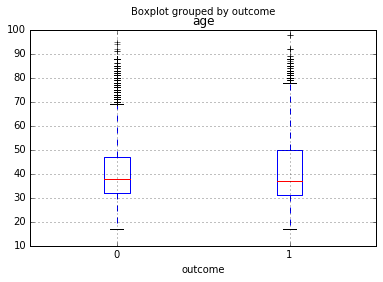

In [47]:
#View the quartile ranges through box and whisker plot and looks like both the medians have a yes and no 
# This may not be a deciding column for analysis
%matplotlib inline
bank_read.boxplot(column='age', by='outcome')

In [8]:
#job vs outcome
bank_read['job'].isnull().sum()
bank_read.groupby('job').outcome.mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: outcome, dtype: float64

In [15]:
#checking the number of unknown job descriptions
#bank_read['job'].unique()
#(bank_read['job']=='admin.').sum()
#330 of 41188 rows has job equal to unknown
#denormalizing the job profiles and previous outcomes into columnar levels and add it to the dataset
#print(job_denorm)
#print(poutcome_dummies)
#bank_read = pd.concat([bank_read, job_denorm, poutcome_denorm], axis=1)
#bank_read.head()
#bank_read.job.value_counts()

In [16]:
print(poutcome_denorm)

       poutcome_failure  poutcome_nonexistent  poutcome_success
0                   0.0                   1.0               0.0
1                   0.0                   1.0               0.0
2                   0.0                   1.0               0.0
3                   0.0                   1.0               0.0
4                   0.0                   1.0               0.0
5                   0.0                   1.0               0.0
6                   0.0                   1.0               0.0
7                   0.0                   1.0               0.0
8                   0.0                   1.0               0.0
9                   0.0                   1.0               0.0
10                  0.0                   1.0               0.0
11                  0.0                   1.0               0.0
12                  0.0                   1.0               0.0
13                  0.0                   1.0               0.0
14                  0.0                 

In [17]:
print(job_denorm)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0             0.0              0.0               0.0            1.0   
1             0.0              0.0               0.0            0.0   
2             0.0              0.0               0.0            0.0   
3             1.0              0.0               0.0            0.0   
4             0.0              0.0               0.0            0.0   
5             0.0              0.0               0.0            0.0   
6             1.0              0.0               0.0            0.0   
7             0.0              1.0               0.0            0.0   
8             0.0              0.0               0.0            0.0   
9             0.0              0.0               0.0            0.0   
10            0.0              1.0               0.0            0.0   
11            0.0              0.0               0.0            0.0   
12            0.0              1.0               0.0            0.0   
13    

In [18]:
#We will concatenate 12+3 columns to our bank data set at the end
#Calculating outcome mean by default and checking if null values present
bank_read['default'].isnull().sum()

0

In [19]:
bank_read.groupby('default').outcome.mean()

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: outcome, dtype: float64

In [20]:
bank_read.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [37]:
#Here credit in default is yes only for 3 out 40000+ records which is a outlier 
#Assuming Unknown credit default values into Yes to make it a two categorical values with YES and NO
#Yes represents - 1 and No - represents 0
bank_read['default'] = bank_read.default.map({'no':0, 'unknown':1, 'yes':1})

In [23]:
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome',
       'default_new'],
      dtype='object')

In [55]:
bank_read.default.value_counts()

0    32588
1     8600
Name: default, dtype: int64

In [25]:
#Remove default_new which is created for testing
#bank_read.drop('default_new',axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [29]:
#Check for null values and do outcome.mean for string vs outcome comparison 
#When comparing outcome vs "column type of int" doing a box/whisker plot
bank_read['marital'].isnull().sum()
bank_read.groupby('marital').outcome.mean()


marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
Name: outcome, dtype: float64

In [30]:
#Hence from above marital may not be a useful feature in predicting
bank_read.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [34]:
print(bank_read['education'].isnull().sum())
print(bank_read.education.value_counts())
bank_read.groupby('education').outcome.mean()
#May not be a useful feature due to the mean values of outcome grouped by education

0
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: outcome, dtype: float64

In [35]:
#Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
# cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome'],
 #     dtype='object')
    
print(bank_read['housing'].isnull().sum())
print(bank_read.housing.value_counts())
bank_read.groupby('housing').outcome.mean()
#May not be a useful feature due to the mean values of outcome grouped by education are nearby

0
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


housing
no         0.108796
unknown    0.108081
yes        0.116194
Name: outcome, dtype: float64

In [21]:
print(bank_read['loan'].isnull().sum())
print(bank_read.loan.value_counts())
bank_read.groupby('loan').outcome.mean()
#May not be a useful feature due to the mean values of outcome grouped by education are nearby
#For useful features that may look dependent on intuition 
#convert values to numerical to compare against outcome 
#convert the column values to numerical if there are two distinct values

0
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


loan
no         0.113402
unknown    0.108081
yes        0.109315
Name: outcome, dtype: float64

In [60]:
#print(bank_read['contact'].isnull().sum())
#print(bank_read.contact.value_counts())
#bank_read.groupby('contact').outcome.mean()
#Below there can be difference in the outcome in the way of contact
#absolute mean difference between type of cellular and telephone contact = 0.09 
#considering the contact as one of the useful feature


<class 'pandas.core.series.Series'>


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome,default_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0


In [6]:
print(type(bank_read['y']))

<class 'pandas.core.series.Series'>


In [4]:
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
bank_read['contactType']=bank_read.contact.map({'cellular':0,'telephone':1})

In [8]:
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'contactType'],
      dtype='object')

In [9]:
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contactType
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [23]:
print(bank_read['month'].isnull().sum())
print(bank_read.month.value_counts())
bank_read.groupby('month').outcome.mean()

0
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: outcome, dtype: float64

In [25]:
#Looks like month column is a good feature to derive outcomes based on the range of values for outcome means
#Lets check if the number of calls each month are nearly same so that month is a good factor
#or else number of calls is a factor for the results
bank_read.groupby('month').outcome.agg(['count', 'mean']).sort_values(by='count')

,count,mean
month,,
dec,182,0.489011
mar,546,0.505495
sep,570,0.449123
oct,718,0.438719
apr,2632,0.204787
nov,4101,0.101439
jun,5318,0.105115
aug,6178,0.106021
jul,7174,0.090466


In [26]:
#It is influenced by number of calls and the more number of calls the lesser the outcome mean 
#Hence month is not a good feature
#Since month is not considered, not taking day_of_week also as a potential influencer on outcome
#Test to export files
#bank_read.to_csv('test.csv')

In [30]:
print('Null Values for duration=' ,bank_read['duration'].isnull().sum())
#There are no null values for duration and duration cannot be taken into consideration
#Since the bank representative calls the customer so he/she is not sure of how many seconds
# is he going to speak with the customer, so duration is not considered as potential indicator of outcome

Null Values for duration= 0


In [31]:
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome'],
      dtype='object')

In [46]:
#print(bank_read['campaign'].isnull().sum())
#print(bank_read.campaign.value_counts())
#bank_read.groupby('campaign').outcome.mean()
bank_read.groupby('campaign').outcome.agg(['count', 'mean']).sort_values(['mean'], ascending=False)
#From the below result it can be seen that campaigns less than 10 has a few outcome of Yes and 
# campaigns less than 4 has a little more outcome mean than the present outcome
# If campaign is considered it would be better to call people who has previous campaign less than equal to 4

,count,mean
campaign,,
1,17642,0.130371
2,10570,0.114570
3,5341,0.107471
4,2651,0.093927
6,979,0.076609
5,1599,0.075047
17,58,0.068966
11,177,0.067797
23,16,0.062500


In [48]:
#print(bank_read['pdays'].isnull().sum())
#print(bank_read.pdays.value_counts())
bank_read.groupby('pdays').outcome.mean()

0
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


pdays
0      0.666667
1      0.307692
2      0.606557
3      0.678815
4      0.533898
5      0.630435
6      0.701456
7      0.666667
8      0.666667
9      0.546875
10     0.576923
11     0.535714
12     0.448276
13     0.777778
14     0.550000
15     0.666667
16     0.545455
17     0.250000
18     0.571429
19     0.333333
20     0.000000
21     1.000000
22     0.666667
25     1.000000
26     1.000000
27     1.000000
999    0.092582
Name: outcome, dtype: float64

/Users/KovidReddy/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


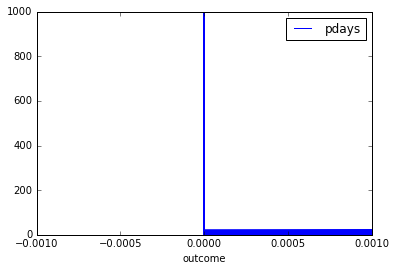

In [4]:
#75% of the clients have never been contacted for the previous campaign and 
#number of times <6 could be taken as a positive sign based on the data
%matplotlib inline
bank_read.plot(y='pdays',x='outcome')


In [5]:
bank_read['previous'].isnull().sum()
print(bank_read.previous.value_counts())
bank_read.groupby('previous').outcome.mean()

0
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


previous
0    0.088322
1    0.212015
2    0.464191
3    0.592593
4    0.542857
5    0.722222
6    0.600000
7    0.000000
Name: outcome, dtype: float64

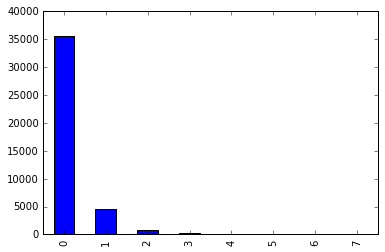

In [10]:
sum_previous=bank_read.previous.value_counts()
my_plot = sum_previous.plot(kind='bar')
#35000 out of 40000 are not previously contacted

In [11]:
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome'],
      dtype='object')

In [15]:
bank_read['emp.var.rate'].isnull().sum()
bank_read.groupby('emp.var.rate').outcome.mean()


emp.var.rate
-3.4    0.423903
-3.0    0.511628
-2.9    0.357186
-1.8    0.159081
-1.7    0.521345
-1.1    0.474016
-0.2    0.100000
-0.1    0.062992
 1.1    0.030916
 1.4    0.053345
Name: outcome, dtype: float64

In [16]:
bank_read['cons.price.idx'].isnull().sum()
bank_read.groupby('cons.price.idx').outcome.mean()



cons.price.idx
92.201    0.342857
92.379    0.397004
92.431    0.402685
92.469    0.370787
92.649    0.470588
92.713    0.511628
92.756    0.100000
92.843    0.446809
92.893    0.090438
92.963    0.369231
93.075    0.179821
93.200    0.052544
93.369    0.568182
93.444    0.052367
93.749    0.557471
93.798    0.626866
93.876    0.575472
93.918    0.060883
93.994    0.030916
94.027    0.515021
94.055    0.467249
94.199    0.495050
94.215    0.565916
94.465    0.042981
94.601    0.455882
94.767    0.453125
Name: outcome, dtype: float64

In [17]:
bank_read['cons.conf.idx'].isnull().sum()
bank_read.groupby('cons.conf.idx').outcome.mean()


cons.conf.idx
-50.8    0.453125
-50.0    0.446809
-49.5    0.455882
-47.1    0.179821
-46.2    0.090438
-45.9    0.100000
-42.7    0.060883
-42.0    0.052544
-41.8    0.042981
-40.8    0.369231
-40.4    0.626866
-40.3    0.565916
-40.0    0.575472
-39.8    0.467249
-38.3    0.515021
-37.5    0.495050
-36.4    0.030916
-36.1    0.052367
-34.8    0.568182
-34.6    0.557471
-33.6    0.370787
-33.0    0.511628
-31.4    0.342857
-30.1    0.470588
-29.8    0.397004
-26.9    0.402685
Name: outcome, dtype: float64

0
euribor3m
0.634    0.750000
0.635    0.511628
0.636    0.214286
0.637    0.833333
0.638    0.714286
0.639    0.687500
0.640    0.500000
0.642    0.485714
0.643    0.478261
0.644    0.631579
0.645    0.423077
0.646    0.469388
0.649    0.600000
0.650    0.333333
0.651    0.428571
0.652    0.771429
0.653    0.684211
0.654    0.650000
0.655    0.705882
0.659    0.666667
0.663    0.363636
0.668    0.500000
0.672    0.437500
0.677    0.583333
0.682    0.512821
0.683    0.785714
0.684    0.625000
0.685    0.555556
0.688    1.000000
0.690    0.666667
           ...   
4.856    0.026446
4.857    0.025105
4.858    0.039563
4.859    0.038071
4.860    0.042601
4.864    0.050766
4.865    0.040214
4.866    0.041176
4.912    0.571429
4.918    0.500000
4.921    0.666667
4.936    0.833333
4.947    0.040816
4.955    0.067961
4.956    0.000000
4.957    0.098696
4.958    0.060241
4.959    0.041341
4.960    0.056269
4.961    0.047319
4.962    0.055109
4.963    0.050663
4.964    0.046809
4.965    0.05975

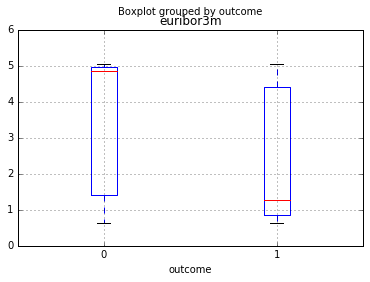

In [18]:
#Great feature for potential conversion from the box plot below shown
print(bank_read['euribor3m'].isnull().sum())
print(bank_read.groupby('euribor3m').outcome.mean())
bank_read.boxplot(column='euribor3m', by='outcome')

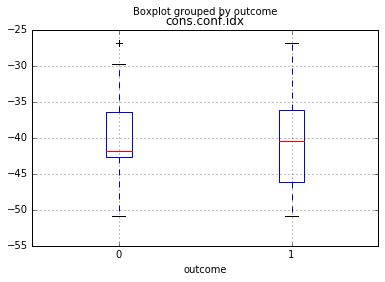

In [20]:
# From the above box plot it is seen that lower euribor rates results in more term deposits
# Higher euribor rates has mostly do not disagree to enrolling to term deposits giving an outcome NO
bank_read.boxplot(column='cons.conf.idx', by='outcome')

In [23]:
job_denorm = pd.get_dummies(bank_read.job, prefix='job')
poutcome_denorm = pd.get_dummies(bank_read.poutcome, prefix='poutcome')
bank_read = pd.concat([bank_read, job_denorm, poutcome_denorm], axis=1)

In [24]:
bank_read.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [26]:
bank_read.columns[-15:]
#15 Columns recently added

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [39]:
#From the above analysis, considering only values which we think to be a determining factor and influencing the outcome 
#more on the visualization and exploration
influence_cols = ['default', 'contactType', 'previous', 'euribor3m'] + list(bank_read.columns[-15:])
inputval = bank_read[influence_cols]
outcomeval = bank_read.outcome


In [40]:
# calculating and validating area under curve
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logregval = LogisticRegression(C=1e9)
cross_val_score(logregval, inputval, outcomeval, cv=10, scoring='roc_auc').mean()

0.81463608388423536

In [43]:
bank_read.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64